In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fp = '../data/full_data.csv'

In [3]:
musics = pd.read_csv(fp).iloc[:, 1:].sort_values(by = 'year')

In [4]:
musics.head()

,title,artist,album,id,year,file,mfcc_0,mfcc_1,mfcc_2,mfcc_3,...,bandwidth,centroid,rolloff,acousticness,danceability,energy,loudness,speechiness,tempo,valence
0,Rapper's Delight,The Sugarhill Gang,The Sugarhill Gang,1FnxNtKli7rcB9IU4J8MEg,1980,./data/Rapper's Delight.mp3,-1.520227,-1.262824,1.255192,1.043891,...,1.840998,1.657349,1.834801,0.2200,0.905,0.692,-14.143,0.199,111.292,0.943
1,The Breaks,Kurtis Blow,Kurtis Blow,5TvcggVu3s2P1fMAS8BupX,1980,./data/The Breaks.mp3,-1.019009,0.545576,-0.092856,-0.443371,...,0.342726,-0.268865,0.025154,0.0987,0.910,0.576,-13.256,0.109,112.877,0.907
2,Apache,The Sugarhill Gang,8th Wonder,4UCkX8nrBlpxjrrEqtb46a,1981,./data/Apache.mp3,0.704940,-0.689719,-1.794352,-1.368239,...,0.180036,0.880376,0.655159,0.3320,0.827,0.928,-7.266,0.133,115.023,0.261
3,8th Wonder,The Sugarhill Gang,8th Wonder,6m0wOLtrzaNwMofVVJTJqs,1981,./data/8th Wonder.mp3,0.443494,-1.131487,-2.393582,-1.267742,...,0.186680,1.368371,0.869361,0.2980,0.871,0.937,-8.536,0.195,106.494,0.675
4,Planet Rock,Afrika Bambaataa,Planet Rock,3uy0jtkM8QYVTsBazkli1x,1982,./data/Planet Rock.mp3,-0.356059,-2.095488,-0.310716,-0.810365,...,1.299604,2.193667,1.856558,0.0110,0.915,0.807,-9.636,0.130,127.350,0.708


### Select features.

In [11]:
music_features = musics.drop(['artist', 'id', 'title', 'album', 'file', 'year'],axis = 1)
music_features.head()

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,bandwidth,centroid,rolloff,acousticness,danceability,energy,loudness,speechiness,tempo,valence
0,-1.520227,-1.262824,1.255192,1.043891,0.264868,0.057711,-0.520458,-0.651726,-0.136915,-1.429831,...,1.840998,1.657349,1.834801,0.2200,0.905,0.692,-14.143,0.199,111.292,0.943
1,-1.019009,0.545576,-0.092856,-0.443371,0.028685,-0.809631,-0.105741,-0.231501,-0.709582,-0.793711,...,0.342726,-0.268865,0.025154,0.0987,0.910,0.576,-13.256,0.109,112.877,0.907
2,0.704940,-0.689719,-1.794352,-1.368239,-2.799835,-0.763931,-0.452717,-0.727814,0.079193,0.632132,...,0.180036,0.880376,0.655159,0.3320,0.827,0.928,-7.266,0.133,115.023,0.261
3,0.443494,-1.131487,-2.393582,-1.267742,-1.568517,-1.060757,-1.317770,-0.028134,-1.346931,-0.236168,...,0.186680,1.368371,0.869361,0.2980,0.871,0.937,-8.536,0.195,106.494,0.675
4,-0.356059,-2.095488,-0.310716,-0.810365,-0.242140,-0.061787,0.300713,0.304347,0.556415,0.369114,...,1.299604,2.193667,1.856558,0.0110,0.915,0.807,-9.636,0.130,127.350,0.708


### Conduct PCA on the features to reduce them to one or two dimensions.

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2)
pca_one_dim = PCA(n_components = 1)

In [14]:
reduced_dim = pca.fit_transform(music_features)
reduced_one = pca_one_dim.fit_transform(music_features)

In [15]:
music_reduced = pd.DataFrame(reduced_dim)
music_reduced.columns = [f'pca_feature{i + 1}' for i in range(2)]
music_reduced['name'] = musics['title']
music_reduced['year'] = musics['year']

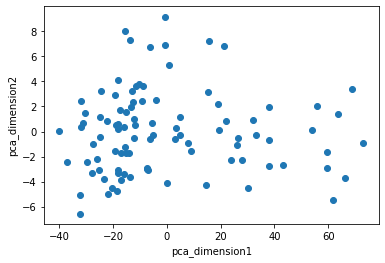

In [16]:
plt.xlabel('pca_dimension1')
plt.ylabel('pca_dimension2')
plt.scatter(x=music_reduced['pca_feature1'], y=music_reduced['pca_feature2'])

### Attempt to cluster the data based on two-dimensional PCA.

In [17]:
from sklearn.cluster import KMeans

In [59]:
kmeans = KMeans(n_clusters=4)

In [60]:
kmeans.fit(music_reduced[[f'pca_feature{i + 1}' for i in range(2)]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [61]:
music_reduced['group_kmeans'] = kmeans.labels_

In [62]:
music_reduced.head()

,pca_feature1,pca_feature2,name,year,group_kmeans,artist
0,-0.822400,6.892138,Rapper's Delight,1980,0,The Sugarhill Gang
1,0.815313,5.302621,The Breaks,1980,0,Kurtis Blow
2,3.044855,-0.584538,Apache,1981,0,The Sugarhill Gang
3,-5.514598,0.654858,8th Wonder,1981,0,The Sugarhill Gang
4,15.315926,3.166765,Planet Rock,1982,1,Afrika Bambaataa


In [63]:
grouped = music_reduced.groupby('group_kmeans')[[f'pca_feature{i + 1}' for i in range(2)]]

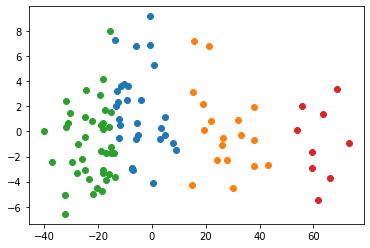

In [64]:
for name, group in grouped:
    plt.plot(group["pca_feature1"], group["pca_feature2"], marker="o", linestyle="", label=name)
plt.savefig('KNN_cluster.png', dpi=300)

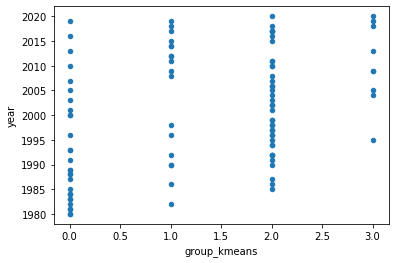

In [65]:
music_reduced[['year', 'group_kmeans']].plot.scatter(y = 'year', x = 'group_kmeans')

#### As you can see, the clusters do not seem very distinct, nor do they vary very significantly by year.

### Plotting two-dimensional results in bokeh

In [25]:
music_reduced['artist'] = musics['artist']

from bokeh.plotting import ColumnDataSource, figure, output_notebook, show, output_file

output_notebook()
# output_file('two_dim_pca.html')

source = ColumnDataSource(data=dict(
    x=list(music_reduced['pca_feature1']),
    y=list(music_reduced['pca_feature2']),
    title=list(music_reduced['name']),
    artist=list(music_reduced['artist']),
    year=list(music_reduced['year'])
))

TOOLTIPS = [
    ("(x,y)", "($x, $y)"),
    ("title", "@title"),
    ("artist", "@artist"),
    ("year", "@year")
]

p = figure(plot_width=600, plot_height=600, tooltips=TOOLTIPS,
           title="2-D PCA Results")

p.circle('x', 'y', size=5, source=source)

show(p)

Loading BokehJS ...

### Plotting one-dimensional PCA results against year.

In [26]:
music_pca_one = music_reduced[['name', 'year', 'artist']].assign(pca = reduced_one)
music_pca_one.head()

,name,year,artist,pca
0,Rapper's Delight,1980,The Sugarhill Gang,-0.822400
1,The Breaks,1980,Kurtis Blow,0.815313
2,Apache,1981,The Sugarhill Gang,3.044855
3,8th Wonder,1981,The Sugarhill Gang,-5.514598
4,Planet Rock,1982,Afrika Bambaataa,15.315926


In [27]:
output_notebook()
# output_file('pca_year.html')

source = ColumnDataSource(data=dict(
    x=list(music_pca_one['year']),
    y=list(music_pca_one['pca']),
    title=list(music_pca_one['name']),
    artist=list(music_pca_one['artist']),
    year=list(music_pca_one['year'])
))

TOOLTIPS = [
    ("(x,y)", "($x, $y)"),
    ("title", "@title"),
    ("artist", "@artist"),
    ("year", "@year")
]

p = figure(plot_width=600, plot_height=600, tooltips=TOOLTIPS,
           title="1-D PCA vs. Year")

p.circle('x', 'y', size=5, source=source)

show(p)

Loading BokehJS ...

#### Visually, we can see that there is a slight association between time and the PCA feature, although the correlation is relatively weak and lacks in explanatory power due to feature being a PCA dimension.

In [34]:
import scipy.stats
result = scipy.stats.pearsonr(music_reduced['year'], music_reduced['pca_feature1'])
print(f'The correlation between the year and the one-dimensional PCA is {result[0]}, with a p-value of {result[1]}. \n\
Therefore, we can conclude that the year and the PCA feature are indeed positively correlated.')

The correlation between the year and the one-dimensional PCA is 0.2323574776388734, with a p-value of 0.02272176187378331. 
Therefore, we can conclude that the year and the PCA feature are indeed positively correlated.
